In [166]:
#!pip install hub
#!pip install av
#!pip install soundfile
#!pip install pytube
#!pip install yt_dlp}
#!pip install librosa
!pip install ffmpeg
#!pip install ffmpeg-python
#!pip install pydub


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
import hub
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf
from pytube import YouTube
from scipy.io.wavfile import read
import wave
import librosa
import librosa.display
import IPython
import scipy.io.wavfile as waves

#### extraccion de audio de youtube

Descargamos dos audios directamente de Youtube, para este ejercicio seran audio muy simples.

In [17]:
url = 'https://www.youtube.com/watch?v=l7IFrF2ojKs'
yt = YouTube(url)
stream = yt.streams.filter(only_audio=True).first()
stream.download(filename='Timbre.wav')


'c:\\Users\\juanj\\Documents\\github\\Procesamiento_y_clasificacion_de_datos\\Tareas\\Tarea_8\\Datos\\Timbre.wav'

In [143]:
url = 'https://www.youtube.com/watch?v=LmpBSYIuYQ8'

yt = YouTube(url)

stream = yt.streams.filter(only_audio=True).first()
audio111 =stream.download(filename='sonidos_W.wav')

In [154]:
print(audio111)

c:\Users\juanj\Documents\github\Procesamiento_y_clasificacion_de_datos\Tareas\Tarea_8\Datos\sonidos_W.wav


In [165]:
import wave

archivo = 'sonidos_W.wav'
with wave.open(archivo, 'rb') as archivo_original:
    # Obtén las propiedades del archivo original
    canales = archivo_original.getnchannels()
    ancho_muestra = archivo_original.getsampwidth()
    frecuencia_muestreo = archivo_original.getframerate()

    # Lee los datos de audio
    datos_audio = archivo_original.readframes(archivo_original.getnframes())

# Crea un nuevo archivo WAV en formato RIFX
with wave.open('sonidos_Wriffx.wav', 'wb') as archivo_rifx:
    archivo_rifx.setnchannels(canales)
    archivo_rifx.setsampwidth(ancho_muestra)
    archivo_rifx.setframerate(frecuencia_muestreo)
    archivo_rifx.writeframesraw(datos_audio)

print("Archivo 'sonidos_Wriffx.wav' creado en formato RIFX.")

Error: file does not start with RIFF id

In [163]:
archivo = 'sonidos_W.wav'
muestreo, sonido = waves.read(archivo)

ValueError: File format b'\x00\x00\x00\x18' not understood. Only 'RIFF' and 'RIFX' supported.

In [134]:

import subprocess

# URL del video de YouTube
url = 'https://www.youtube.com/watch?v=LmpBSYIuYQ8'

# Descargar el video
yt = YouTube(url)
stream = yt.streams.filter(only_audio=True).first()
stream.download(filename='sonidos_W.mp3')

input_mp3 = 'sonidos_W.mp3'


In [149]:
from pydub import AudioSegment

# Cargar el archivo MP3
mp3_file = 'sonidos_W.mp3'
sound = AudioSegment.from_mp3(mp3_file)

# Exportar a WAV con la misma frecuencia de muestreo que el archivo original
wav_file = 'sonidos_W1.wav'
sound.export(wav_file, format="wav")

print(f"Archivo WAV generado: {wav_file}")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

In [150]:
Fs,data =read(wav_file)

NameError: name 'wav_file' is not defined

Para emplear las librerias de pandas en audios estos deben estar en formato ".wav" codificado en "RIFF", por loque procederemos a modificarmo mediante la libreria "wave", este proceso lo realizamos para los dos audios.

In [155]:
import wave
import numpy as np

ruta_archivo_wav = "sonidos_W.wav"
datos_binarios = np.fromfile(ruta_archivo_wav, dtype=np.int32)

# Configuración del archivo WAV
canales = 1
profundidad_bits = 32
frecuencia_muestreo = 44100

with wave.open("sonidos_Wriff2.wav", "wb") as archivo_wav:
    archivo_wav.setnchannels(canales)
    archivo_wav.setsampwidth(profundidad_bits // 8)
    archivo_wav.setframerate(frecuencia_muestreo)
    archivo_wav.writeframesraw(datos_binarios.tobytes())


In [156]:
audio_1 ='sonidos_Wriff2.wav'
IPython.display.Audio(audio_1)

In [151]:
ruta_archivo_wav = "sonidos_W.wav"
datos_binarios = np.fromfile(ruta_archivo_wav, dtype=np.int32)
#### configuaracion del archivo, se remuestrea para la nueva codificacion
canales = 1  #1 para sonido mono 2 para sonido estereo
profundidad_bits = 16  #16 o 32 bits 
frecuencia_muestreo = 44100

with wave.open("sonidos_Wriff.wav", "wb") as archivo_wav:
    archivo_wav.setnchannels(canales)
    archivo_wav.setsampwidth(profundidad_bits // 8)
    archivo_wav.setframerate(frecuencia_muestreo)
    archivo_wav.writeframesraw(datos_binarios.tobytes())


In [23]:
# Datos de audio en formato binario (reemplaza con tus datos)
datos_binarios = b'Timbre.wav'  # Tus datos aquí
#### configuaracion del archivo, se remuestrea para la nueva codificacion
canales = 1
profundidad_bits = 32
frecuencia_muestreo = 44100

# Crear archivo WAV
with wave.open("Timbreriff.wav", "wb") as archivo_wav:
    archivo_wav.setnchannels(canales)
    archivo_wav.setsampwidth(profundidad_bits // 8)
    archivo_wav.setframerate(frecuencia_muestreo)
    archivo_wav.writeframesraw(datos_binarios)

In [94]:
audio_1 ='sonidos_Wriff.wav'
IPython.display.Audio(audio_1)

In [80]:
from scipy.io import wavfile

# Ruta al archivo WAV que deseas reproducir
ruta_audio = "sonidos_Wriff.wav"

# Leer el archivo WAV
samplerate, data = wavfile.read(ruta_audio)

print(f"Frecuencia de muestreo: {samplerate} Hz")
print(f"Datos de audio (primeros 10 valores): {data[:10]}")

Frecuencia de muestreo: 1000 Hz
Datos de audio (primeros 10 valores): [    0  6144 29798 28793 24932 26739     0     0 29545 13935]


In [40]:
audio1 ='sonidos_Wriff.wav'
Fs,data=read(audio1)

print('(=)sampling rate {} Hz',format(Fs))

(=)sampling rate {} Hz 44100


Muestra 1: Duración: 0.00 segundos
Muestra 2: Duración: 0.01 segundos


ValueError: 'ya_no_me_alcanza_el_dinero.wav' is not a valid format string (unrecognized character 'a')

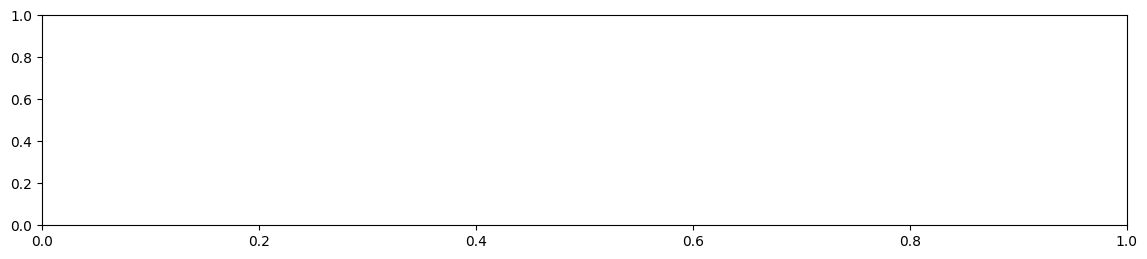

In [ ]:

sr = 8000

# Mostrar información básica de las muestras
print(f'Muestra 1: Duración: {len(archivo_audio1) / sr:.2f} segundos')
print(f'Muestra 2: Duración: {len(archivo_audio2) / sr:.2f} segundos')

# Visualizar las ondas de las muestras de audio
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(archivo_audio1) / sr, len(archivo_audio1)), archivo_audio1)
plt.title('Muestra de Audio 1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, len(archivo_audio2) / sr, len(archivo_audio2)), archivo_audio2)
plt.title('Muestra de Audio 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()